In [2]:
RESULT_DIR = './results/blur/'

In [1]:
%matplotlib inline
import sys 
sys.path.append('../')
import torch
from blurnet.models import AlexNetCifar10
from blurnet.utils import dataloader, GaussianBlurAll
import matplotlib.pyplot as plt

In [3]:
def calc_acc(kernel_size, sigma):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0], data[1].to(device)
            inputs = GaussianBlurAll(inputs, kernel_size, sigma).to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    return correct / total

In [4]:
def test_each_class(kernel_size, sigma):
    # Accuracy for each class
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            # making images blurred
            images = GaussianBlurAll(images.cpu(), kernel_size, sigma).to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [5]:
# data settings
trainloader, testloader, _ = dataloader(batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
MODELS_DIR = '../logs/models/'

In [8]:
MODEL =  'normal_60e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
normal = []
normal.append(calc_acc((1,1), 0))
normal.append(calc_acc((7,7), 1))
normal.append(calc_acc((13,13), 2))
normal.append(calc_acc((19,19), 3))
normal.append(calc_acc((25,25), 4))
normal.append(calc_acc((31,31), 5))

# blur-half

In [9]:
MODEL =  'blur-half_s1_k7-7'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_s1 = []
blur_half_s1.append(calc_acc((1,1), 0))
blur_half_s1.append(calc_acc((7,7), 1))
blur_half_s1.append(calc_acc((13,13), 2))
blur_half_s1.append(calc_acc((19,19), 3))
blur_half_s1.append(calc_acc((25,25), 4))
blur_half_s1.append(calc_acc((31,31), 5))

In [10]:
MODEL =  'blur-half_s2_k13-13'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_s2 = []
blur_half_s2.append(calc_acc((1,1), 0))
blur_half_s2.append(calc_acc((7,7), 1))
blur_half_s2.append(calc_acc((13,13), 2))
blur_half_s2.append(calc_acc((19,19), 3))
blur_half_s2.append(calc_acc((25,25), 4))
blur_half_s2.append(calc_acc((31,31), 5))

In [11]:
MODEL =  'blur-half_s3_k19-19'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_s3 = []
blur_half_s3.append(calc_acc((1,1), 0))
blur_half_s3.append(calc_acc((7,7), 1))
blur_half_s3.append(calc_acc((13,13), 2))
blur_half_s3.append(calc_acc((19,19), 3))
blur_half_s3.append(calc_acc((25,25), 4))
blur_half_s3.append(calc_acc((31,31), 5))

In [12]:
MODEL =  'blur-half_s4_k25-25'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_s4 = []
blur_half_s4.append(calc_acc((1,1), 0))
blur_half_s4.append(calc_acc((7,7), 1))
blur_half_s4.append(calc_acc((13,13), 2))
blur_half_s4.append(calc_acc((19,19), 3))
blur_half_s4.append(calc_acc((25,25), 4))
blur_half_s4.append(calc_acc((31,31), 5))

In [13]:
MODEL =  'blur-half_s5_k31-31'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_s5 = []
blur_half_s5.append(calc_acc((1,1), 0))
blur_half_s5.append(calc_acc((7,7), 1))
blur_half_s5.append(calc_acc((13,13), 2))
blur_half_s5.append(calc_acc((19,19), 3))
blur_half_s5.append(calc_acc((25,25), 4))
blur_half_s5.append(calc_acc((31,31), 5))

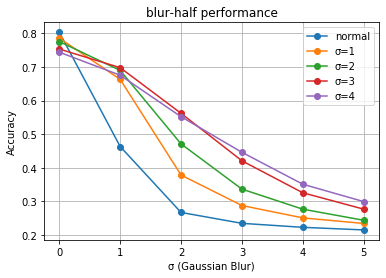

In [14]:
x = [0, 1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.title("blur-half performance")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, blur_half_s1, label='σ=1', marker="o")
ax.plot(x, blur_half_s2, label='σ=2', marker="o")
ax.plot(x, blur_half_s3, label='σ=3', marker="o")
ax.plot(x, blur_half_s4, label='σ=4', marker="o")
# ax.plot(x, blur_half_s5, label='σ=5', marker="o")
ax.set_xlabel('σ (Gaussian Blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig(RESULT_DIR + 'comparison_blur-half.png')

# blur-half-data

In [15]:
MODEL =  'blur-half-data_s1_k7-7_90e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_data_s1 = []
blur_half_data_s1.append(calc_acc((1,1), 0))
blur_half_data_s1.append(calc_acc((7,7), 1))
blur_half_data_s1.append(calc_acc((13,13), 2))
blur_half_data_s1.append(calc_acc((19,19), 3))
blur_half_data_s1.append(calc_acc((25,25), 4))
blur_half_data_s1.append(calc_acc((31,31), 5))

In [16]:
MODEL =  'blur-half-data_s2_k13-13_90e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_data_s2 = []
blur_half_data_s2.append(calc_acc((1,1), 0))
blur_half_data_s2.append(calc_acc((7,7), 1))
blur_half_data_s2.append(calc_acc((13,13), 2))
blur_half_data_s2.append(calc_acc((19,19), 3))
blur_half_data_s2.append(calc_acc((25,25), 4))
blur_half_data_s2.append(calc_acc((31,31), 5))

In [17]:
MODEL =  'blur-half-data_s3_k19-19_90e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_data_s3 = []
blur_half_data_s3.append(calc_acc((1,1), 0))
blur_half_data_s3.append(calc_acc((7,7), 1))
blur_half_data_s3.append(calc_acc((13,13), 2))
blur_half_data_s3.append(calc_acc((19,19), 3))
blur_half_data_s3.append(calc_acc((25,25), 4))
blur_half_data_s3.append(calc_acc((31,31), 5))

In [18]:
MODEL =  'blur-half-data_s4_k25-25_90e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_data_s4 = []
blur_half_data_s4.append(calc_acc((1,1), 0))
blur_half_data_s4.append(calc_acc((7,7), 1))
blur_half_data_s4.append(calc_acc((13,13), 2))
blur_half_data_s4.append(calc_acc((19,19), 3))
blur_half_data_s4.append(calc_acc((25,25), 4))
blur_half_data_s4.append(calc_acc((31,31), 5))

In [19]:
MODEL =  'blur-half-data_s5_k31-31_90e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_half_data_s5 = []
blur_half_data_s5.append(calc_acc((1,1), 0))
blur_half_data_s5.append(calc_acc((7,7), 1))
blur_half_data_s5.append(calc_acc((13,13), 2))
blur_half_data_s5.append(calc_acc((19,19), 3))
blur_half_data_s5.append(calc_acc((25,25), 4))
blur_half_data_s5.append(calc_acc((31,31), 5))

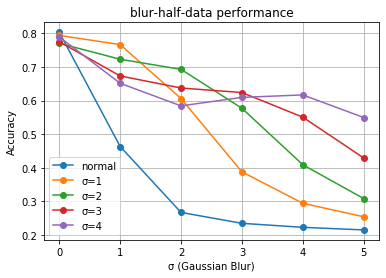

In [20]:
x = [0, 1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.title("blur-half-data performance")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, blur_half_data_s1, label='σ=1', marker="o")
ax.plot(x, blur_half_data_s2, label='σ=2', marker="o")
ax.plot(x, blur_half_data_s3, label='σ=3', marker="o")
ax.plot(x, blur_half_data_s4, label='σ=4', marker="o")
# ax.plot(x, blur_half_data_s5, label='σ=5', marker="o")
ax.set_xlabel('σ (Gaussian Blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig(RESULT_DIR + 'comparison_blur-half-data.png')

# blur-step

In [21]:
MODEL =  'blur-step_s4-3-2-1_150e'
EPOCH = 60
MODEL_PATH = MODELS_DIR + MODEL + '/' + 'model_{:03d}.pth.tar'.format(EPOCH)

checkpoint = torch.load(MODEL_PATH)

model = AlexNetCifar10().to(device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# record accuracies with different blurs
blur_step = []
blur_step.append(calc_acc((1,1), 0))
blur_step.append(calc_acc((7,7), 1))
blur_step.append(calc_acc((13,13), 2))
blur_step.append(calc_acc((19,19), 3))
blur_step.append(calc_acc((25,25), 4))
blur_step.append(calc_acc((31,31), 5))

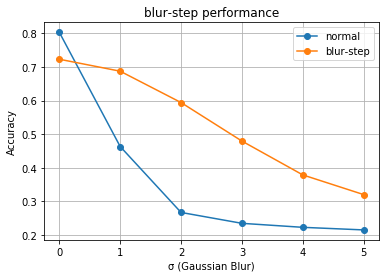

In [22]:
x = [0, 1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.title("blur-step performance")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, blur_step, label='blur-step', marker="o")
ax.set_xlabel('σ (Gaussian Blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig(RESULT_DIR + 'comparison_blur-step.png')

# comparison

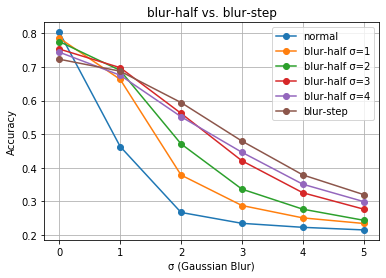

In [23]:
x = [0, 1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.title("blur-half vs. blur-step")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, blur_half_s1, label='blur-half σ=1', marker="o")
ax.plot(x, blur_half_s2, label='blur-half σ=2', marker="o")
ax.plot(x, blur_half_s3, label='blur-half σ=3', marker="o")
ax.plot(x, blur_half_s4, label='blur-half σ=4', marker="o")
ax.plot(x, blur_step, label='blur-step', marker="o")
ax.set_xlabel('σ (Gaussian Blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig(RESULT_DIR + 'comparison_half-vs-step.png')

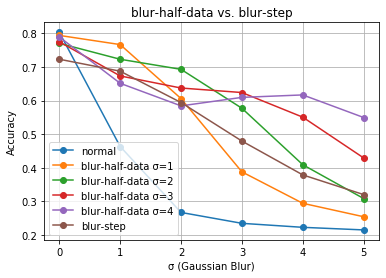

In [24]:
x = [0, 1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.title("blur-half-data vs. blur-step")
ax.plot(x, normal, label='normal', marker="o")
ax.plot(x, blur_half_data_s1, label='blur-half-data σ=1', marker="o")
ax.plot(x, blur_half_data_s2, label='blur-half-data σ=2', marker="o")
ax.plot(x, blur_half_data_s3, label='blur-half-data σ=3', marker="o")
ax.plot(x, blur_half_data_s4, label='blur-half-data σ=4', marker="o")
ax.plot(x, blur_step, label='blur-step', marker="o")
ax.set_xlabel('σ (Gaussian Blur)')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
fig.show()
fig.savefig(RESULT_DIR + 'comparison_half-data-vs-step.png')